In [51]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
file_path = "Dataset_Dolar.csv"
df = pd.read_csv(file_path)
df = df[['t', 'ano', 'mes', 'cotacao', 'ipca_acumulado', 'cpi', 'selic',
       'divida_pp', 'fed_rate']]
# Criar novas features (médias móveis e desvio padrão)
for shift_val in range(1,7):
    for column in ['cotacao', 'ipca_acumulado', 'cpi', 'selic',
           'divida_pp', 'fed_rate']:
        column_name = column + f'_{str(shift_val)}'
        df[column_name] = df[column].shift(shift_val)
        df.fillna(df[column].values[0], inplace=True)  # Lidar com NaNs no início
display(df)
# Definir variáveis preditoras e alvo
X = df.drop(columns=['t', 'ano', 'mes', 'cotacao', 'ipca_acumulado', 'cpi', 'selic',
       'divida_pp', 'fed_rate'])#df.drop(columns=['cotacao', 't', 'ano', 'mes'])  # Remover colunas irrelevantes
y = df['cotacao']
display(X)
display(y)

,t,ano,mes,cotacao,ipca_acumulado,cpi,selic,divida_pp,fed_rate,cotacao_1,...,cpi_5,selic_5,divida_pp_5,fed_rate_5,cotacao_6,ipca_acumulado_6,cpi_6,selic_6,divida_pp_6,fed_rate_6
0,1,2000,1,1.7840,9.22,169.300,18.937619,51.27,5.45,1.7840,...,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,51.27,5.45
1,2,2000,2,1.7680,9.35,170.000,18.869524,51.27,5.73,1.7840,...,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,51.27,5.45
2,3,2000,3,1.7395,9.57,171.000,18.846667,51.27,5.85,1.7680,...,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,51.27,5.45
3,4,2000,4,1.8050,9.99,170.900,18.618421,51.27,6.02,1.7395,...,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,51.27,5.45
4,5,2000,5,1.8240,10.00,171.200,18.512727,51.27,6.27,1.8050,...,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,51.27,5.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,295,2024,7,5.6500,157.05,313.534,10.400000,77.44,5.33,5.5925,...,311.054,11.150000,74.85,5.33,4.9526,154.63,309.685,11.650000,74.50,5.33
295,296,2024,8,5.6103,157.03,314.121,10.400000,77.65,5.33,5.6500,...,312.230,11.000000,75.09,5.33,4.9716,155.46,311.054,11.150000,74.85,5.33
296,297,2024,9,5.4482,157.47,314.686,10.495238,77.44,5.13,5.6103,...,313.207,10.650000,75.26,5.33,5.0153,155.62,312.230,11.000000,75.09,5.33
297,298,2024,10,5.7867,158.03,315.454,10.650000,77.75,4.83,5.4482,...,313.225,10.459524,75.81,5.33,5.1934,156.00,313.207,10.650000,75.26,5.33


,cotacao_1,ipca_acumulado_1,cpi_1,selic_1,divida_pp_1,fed_rate_1,cotacao_2,ipca_acumulado_2,cpi_2,selic_2,...,cpi_5,selic_5,divida_pp_5,fed_rate_5,cotacao_6,ipca_acumulado_6,cpi_6,selic_6,divida_pp_6,fed_rate_6
0,1.7840,9.22,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,...,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,51.27,5.45
1,1.7840,9.22,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,...,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,51.27,5.45
2,1.7680,9.35,170.000,18.869524,51.27,5.73,1.7840,9.22,169.300,18.937619,...,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,51.27,5.45
3,1.7395,9.57,171.000,18.846667,51.27,5.85,1.7680,9.35,170.000,18.869524,...,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,51.27,5.45
4,1.8050,9.99,170.900,18.618421,51.27,6.02,1.7395,9.57,171.000,18.846667,...,169.300,18.937619,51.27,5.45,1.7840,9.22,169.300,18.937619,51.27,5.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,5.5925,156.67,313.049,10.400000,76.85,5.33,5.2443,156.46,313.225,10.459524,...,311.054,11.150000,74.85,5.33,4.9526,154.63,309.685,11.650000,74.50,5.33
295,5.6500,157.05,313.534,10.400000,77.44,5.33,5.5925,156.67,313.049,10.400000,...,312.230,11.000000,75.09,5.33,4.9716,155.46,311.054,11.150000,74.85,5.33
296,5.6103,157.03,314.121,10.400000,77.65,5.33,5.6500,157.05,313.534,10.400000,...,313.207,10.650000,75.26,5.33,5.0153,155.62,312.230,11.000000,75.09,5.33
297,5.4482,157.47,314.686,10.495238,77.44,5.13,5.6103,157.03,314.121,10.400000,...,313.225,10.459524,75.81,5.33,5.1934,156.00,313.207,10.650000,75.26,5.33


0      1.7840
1      1.7680
2      1.7395
3      1.8050
4      1.8240
        ...  
294    5.6500
295    5.6103
296    5.4482
297    5.7867
298    5.9730
Name: cotacao, Length: 299, dtype: float64

RMSE: 0.17895810077222457
Erro Médio Absoluto no Teste: 0.1449469117981365
R² score: 0.6232786012212338
Desvio padrão dos resíduos no teste: 0.17839492210141777


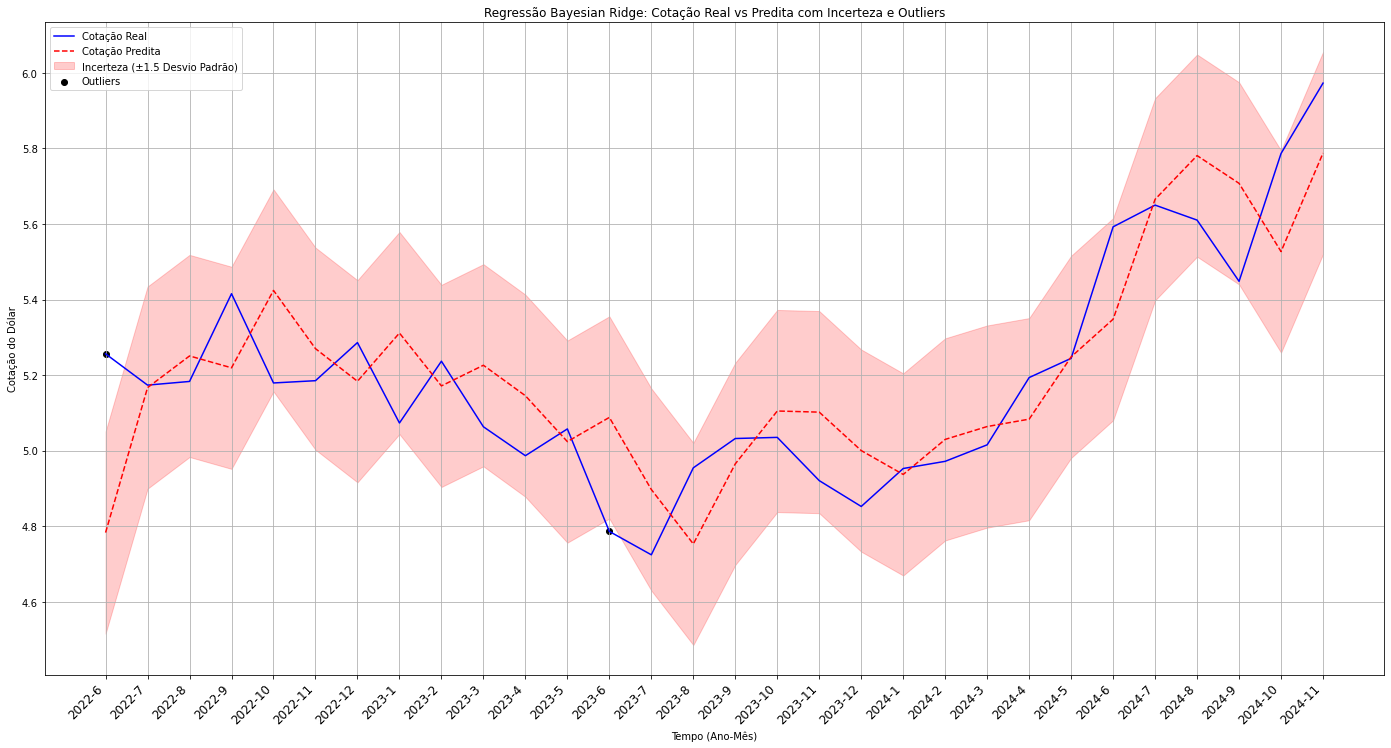

In [52]:
# Separar treino e teste preservando a ordem temporal (80% treino, 20% teste)
train_size = int(len(df) * 0.90)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Normalizar os dados com MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir o modelo Bayesian Ridge
bayesian_ridge = BayesianRidge()

# Treinamento do modelo
bayesian_ridge.fit(X_train_scaled, y_train)

# Previsões para o conjunto de teste
y_test_pred = bayesian_ridge.predict(X_test_scaled)

# Calcular erro médio absoluto, RMSE e R²
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
rmse = root_mean_squared_error(y_test, y_test_pred)
print(f'RMSE: {rmse}')
print("Erro Médio Absoluto no Teste:", mae)
print("R² score:", r2)

# Calcular os resíduos (erro) no conjunto de teste
residuos_test = y_test - y_test_pred
std_dev = np.std(residuos_test)

print(f"Desvio padrão dos resíduos no teste: {std_dev}")

# Definir o fator de multiplicação para a faixa de incerteza
mul_std = 1.5

# Identificar pontos que estão fora da faixa de incerteza
lower_bound = y_test_pred - mul_std * std_dev
upper_bound = y_test_pred + mul_std * std_dev
outliers_mask = (y_test.values < lower_bound) | (y_test.values > upper_bound)

# Criar rótulos do eixo X (ano-mês) para o conjunto de teste
x_labels = df.iloc[train_size:][['ano', 'mes']].astype(str).agg('-'.join, axis=1).values

# Criar gráfico de predição vs. real
plt.figure(figsize=(24, 12))
plt.plot(x_labels, y_test.values, label="Cotação Real", color="blue")
plt.plot(x_labels, y_test_pred, label="Cotação Predita", color="red", linestyle="dashed")

# Adicionar faixa de incerteza
plt.fill_between(x_labels, lower_bound, upper_bound, 
                 color='red', alpha=0.2, label=f"Incerteza (±{mul_std} Desvio Padrão)")

# Plotar os outliers como pontos destacados
plt.scatter(np.array(x_labels)[outliers_mask], y_test.values[outliers_mask], 
            color='black', marker='o', label="Outliers")

# Melhorar legibilidade do eixo X
plt.xticks(rotation=45, ha='right', fontsize=12)

# Configurações do gráfico
plt.xlabel("Tempo (Ano-Mês)")
plt.ylabel("Cotação do Dólar")
plt.title("Regressão Bayesian Ridge: Cotação Real vs Predita com Incerteza e Outliers")
plt.legend()
plt.grid()
plt.show()

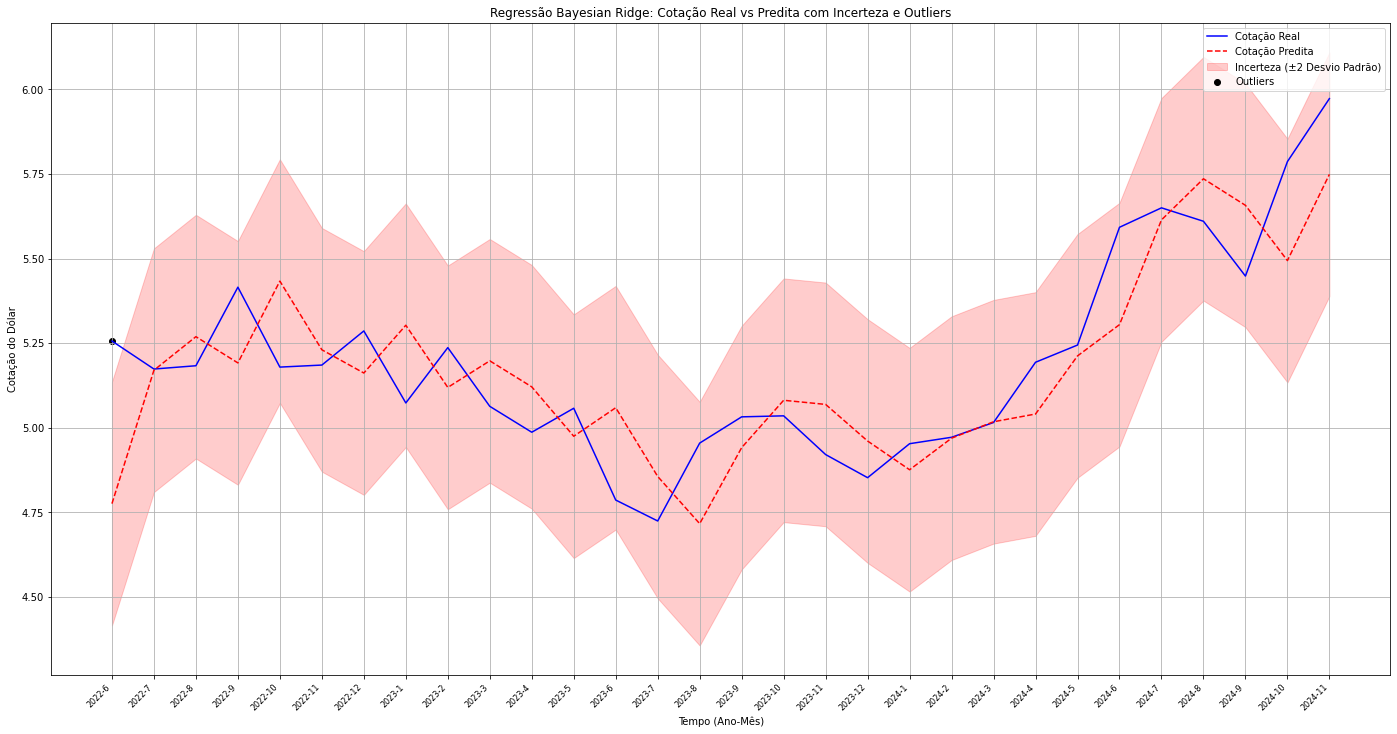

In [48]:
# Definir o fator de multiplicação para a faixa de incerteza
mul_std = 2

# Identificar pontos que estão fora da faixa de incerteza
lower_bound = y_test_pred - mul_std * std_dev
upper_bound = y_test_pred + mul_std * std_dev
outliers_mask = (y_test.values < lower_bound) | (y_test.values > upper_bound)

# Criar rótulos do eixo X (ano-mês) para o conjunto de teste
x_labels = df.iloc[train_size:][['ano', 'mes']].astype(str).agg('-'.join, axis=1).values

# Criar gráfico de predição vs. real
plt.figure(figsize=(24, 12))
plt.plot(x_labels, y_test.values, label="Cotação Real", color="blue")
plt.plot(x_labels, y_test_pred, label="Cotação Predita", color="red", linestyle="dashed")

# Adicionar faixa de incerteza
plt.fill_between(x_labels, lower_bound, upper_bound, 
                 color='red', alpha=0.2, label=f"Incerteza (±{mul_std} Desvio Padrão)")

# Plotar os outliers como pontos destacados
plt.scatter(np.array(x_labels)[outliers_mask], y_test.values[outliers_mask], 
            color='black', marker='o', label="Outliers")

# Melhorar legibilidade do eixo X
plt.xticks(rotation=45, ha='right', fontsize=8)

# Configurações do gráfico
plt.xlabel("Tempo (Ano-Mês)")
plt.ylabel("Cotação do Dólar")
plt.title("Regressão Bayesian Ridge: Cotação Real vs Predita com Incerteza e Outliers")
plt.legend()
plt.grid()
plt.show()